In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
import utils

In [2]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

image.shape = (333, 500, 3)


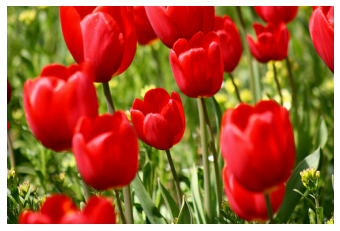

In [3]:
image, label = next(iter(train_ds))
print(f"image.shape = {image.shape}")
utils.plot_image(image)

In [4]:
preprocessed = image / 255
preprocessed = tf.expand_dims(preprocessed, 0)

## Lambda layer

In [5]:
def random_invert(x, p=0.5):
    return (1.0 - x) if tf.random.uniform([]) < p else x

def build_random_invert_layer(factor=0.5):
    return layers.Lambda(lambda x: random_invert(x, factor))

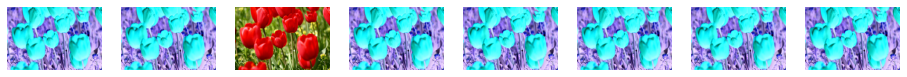

In [6]:
random_invert_layer = build_random_invert_layer()

augmented_images = []
for _ in range(8):
    augmented = random_invert_layer(preprocessed)
    augmented_images.append(augmented)

utils.plot_images(augmented_images)

## Custom layer

In [7]:
class RandomInvert(layers.Layer):
    def __init__(self, factor=0.5, **kwargs):
        super().__init__(**kwargs)
        self.factor = factor

    def call(self, inputs, **kwargs):
        return random_invert(inputs, self.factor)

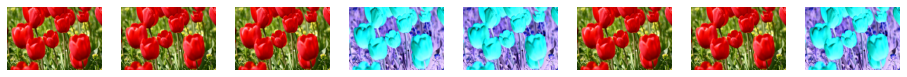

In [8]:
random_invert_layer = RandomInvert(factor=0.5)

augmented_images = []
for _ in range(8):
    augmented = random_invert_layer(preprocessed)
    augmented_images.append(augmented)

utils.plot_images(augmented_images)